In [3]:
import pandas as pd
#loading hot news crypto dataset 
hot_crypto=pd.read_csv('/Users/adityaravindrabhat/Documents/GitHub/engagement_models/Datasets/hot_news_crypto_v1.csv')
hot_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16026 entries, 0 to 16025
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              16026 non-null  int64  
 1   title             16026 non-null  object 
 2   score             16026 non-null  int64  
 3   id                16026 non-null  object 
 4   url               16026 non-null  object 
 5   comms_num         16026 non-null  int64  
 6   author            16026 non-null  object 
 7   upvote_ratio      16026 non-null  float64
 8   flair             12810 non-null  object 
 9   created_utc       16026 non-null  object 
 10  clicked           16026 non-null  bool   
 11  edited            16026 non-null  object 
 12  no_crossposts     16026 non-null  int64  
 13  domain            16026 non-null  object 
 14  is_crosspostable  16026 non-null  bool   
 15  visited           16026 non-null  bool   
 16  upvote            16026 non-null  object

In [4]:
#loading new crypto news articles 
new_crypto =pd.read_csv('/Users/adityaravindrabhat/Documents/GitHub/engagement_models/Datasets/new_crypto1.csv')
new_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12794 entries, 0 to 12793
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              12794 non-null  int64  
 1   title             12794 non-null  object 
 2   score             12794 non-null  int64  
 3   id                12794 non-null  object 
 4   url               12794 non-null  object 
 5   comms_num         12794 non-null  int64  
 6   author            12794 non-null  object 
 7   upvote_ratio      12794 non-null  float64
 8   flair             10002 non-null  object 
 9   created_utc       12794 non-null  object 
 10  clicked           12794 non-null  bool   
 11  edited            12794 non-null  object 
 12  no_crossposts     12794 non-null  int64  
 13  domain            12794 non-null  object 
 14  is_crosspostable  12794 non-null  bool   
 15  visited           12794 non-null  bool   
 16  upvote            12794 non-null  object

In [5]:
#converting the created date column to datetime for analysis
new_crypto[['created_date']]=new_crypto[['created_date']].apply(pd.to_datetime)

In [6]:
#converting the created date column to datetime for analysis
hot_crypto[['created_date']]=hot_crypto[['created_date']].apply(pd.to_datetime)

### Feature engineering

In [7]:
#creating a day of week column
hot_crypto['day_of_week']=hot_crypto['created_date'].dt.day_name()

In [8]:
#creating a day of week column
new_crypto['day_of_week']=new_crypto['created_date'].dt.day_name()

In [9]:
#creating time of the dy categorical column
hot_crypto['time_of_day']=pd.cut(pd.to_timedelta(hot_crypto['created_time']), pd.to_timedelta(['04:00:00','12:00:00','17:00:00','23:59:59']),
          labels=['Morning','Afternoon','Evening']).astype(str).replace('nan','Midnight')

In [10]:
#creating time of the dy categorical column
new_crypto['time_of_day']=pd.cut(pd.to_timedelta(new_crypto['created_time']), pd.to_timedelta(['04:00:00','12:00:00','17:00:00','23:59:59']),
          labels=['Morning','Afternoon','Evening']).astype(str).replace('nan','Midnight')

In [61]:
x=[1,2,3,4]


4

#### Creating a variable to identify the cycle of data collection

In [62]:
import itertools
x=[1,2,3,4]
h_crypto=hot_crypto.copy()

cycles=[]
counter=0
n=0
for i in range(len(h_crypto.index)):
    
            cycles.append(x)
            counter=counter+1
            if (counter==50):
                n+=1
                counter=0
                
    


IndexError: list index out of range

In [58]:
len(h_crypto.index)

16026

### Sorting the dataframe to check the rank differences at different times 

In [15]:
h_crypto=hot_crypto.copy()
h_crypto=h_crypto.sort_values(by=['id'])
h_crypto['Repeated']=h_crypto.duplicated(subset=['id'],keep='first')
h_crypto=h_crypto.reset_index()
h_crypto.head(15)

,index,Rank,title,score,id,url,comms_num,author,upvote_ratio,flair,...,upvote,ups,is_video,link_flair_text,gilded,created_date,created_time,day_of_week,time_of_day,Repeated
0,74,27,Don’t blow all your money on this dip - it can...,7170,oo6rrz,https://www.reddit.com/r/CryptoCurrency/commen...,1694,TurbulentMoon,0.89,Gold | QC: CC 48,...,<bound method VotableMixin.upvote of Submissio...,7170,False,STRATEGY,1,2021-07-20,13:29:43,Tuesday,Afternoon,False
1,16,18,Don’t blow all your money on this dip - it can...,7162,oo6rrz,https://www.reddit.com/r/CryptoCurrency/commen...,1690,TurbulentMoon,0.89,Gold | QC: CC 48,...,<bound method VotableMixin.upvote of Submissio...,7162,False,STRATEGY,1,2021-07-20,13:29:43,Tuesday,Afternoon,True
2,88,41,I HIT A JACKPOT on Binance 4th anniversary!,201,ooll6z,https://www.reddit.com/r/CryptoCurrency/commen...,155,anakanin,0.86,NaN,...,<bound method VotableMixin.upvote of Submissio...,201,False,EXCHANGE,0,2021-07-21,4:25:14,Wednesday,Morning,False
3,36,38,I HIT A JACKPOT on Binance 4th anniversary!,167,ooll6z,https://www.reddit.com/r/CryptoCurrency/commen...,149,anakanin,0.84,NaN,...,<bound method VotableMixin.upvote of Submissio...,167,False,EXCHANGE,0,2021-07-21,4:25:14,Wednesday,Morning,True
4,34,36,Stop reading the charts and go read a book (5 ...,152,oomc6w,https://www.reddit.com/r/CryptoCurrency/commen...,143,waughandy,0.90,NaN,...,<bound method VotableMixin.upvote of Submissio...,152,False,EDUCATIONAL,0,2021-07-21,5:25:01,Wednesday,Morning,False
5,92,45,Stop reading the charts and go read a book (5 ...,153,oomc6w,https://www.reddit.com/r/CryptoCurrency/commen...,143,waughandy,0.90,NaN,...,<bound method VotableMixin.upvote of Submissio...,153,False,EDUCATIONAL,0,2021-07-21,5:25:01,Wednesday,Morning,True
6,70,23,I made a table of the top 100 coins that repre...,320,oomlj7,https://www.reddit.com/r/CryptoCurrency/commen...,232,Bonapoke,0.94,Tin,...,<bound method VotableMixin.upvote of Submissio...,320,False,METRICS,0,2021-07-21,5:45:49,Wednesday,Morning,False
7,15,17,I made a table of the top 100 coins that repre...,305,oomlj7,https://www.reddit.com/r/CryptoCurrency/commen...,229,Bonapoke,0.94,Tin,...,<bound method VotableMixin.upvote of Submissio...,305,False,METRICS,0,2021-07-21,5:45:49,Wednesday,Morning,True
8,39,41,DCA vs. Lump-sum vs. Value Averaging. A real d...,124,oomlpn,https://www.reddit.com/r/CryptoCurrency/commen...,111,TeddyousGreg,0.92,,...,<bound method VotableMixin.upvote of Submissio...,124,False,STRATEGY,1,2021-07-21,5:46:14,Wednesday,Morning,False
9,72,25,We aren't ready yet.,263,oomu0t,https://www.reddit.com/r/CryptoCurrency/commen...,394,masterzergin,0.79,"Gold | QC: CC 52, ADA 26",...,<bound method VotableMixin.upvote of Submissio...,263,False,FOCUSED-DISCUSSION,0,2021-07-21,6:04:16,Wednesday,Morning,False


### Analysis

In [11]:
#getting the unique posts in the new_crypto for analysis

new_crypto_unique=new_crypto.drop_duplicates(subset=['id'],keep='first',ignore_index=True)
new_crypto_unique.shape

(12444, 25)

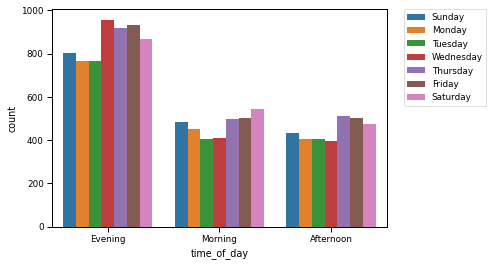

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_context('paper')
plot_order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sns.countplot(x="time_of_day",data=new_crypto_unique,hue='day_of_week',hue_order=plot_order)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
plt.savefig('/Users/adityaravindrabhat/Downloads/Final Datasets/crypto_postings.png',bbox_inches='tight')

In [35]:
#getting the unique rows from hot crypto to merge it with uniue crypto
hot_crypto_unique=hot_crypto.drop_duplicates(subset=['id'],keep='first',ignore_index=True)
hot_crypto_unique.shape

(8033, 25)

In [36]:
#merging the hot_uniue with new_unique to get the dataframe of trending posts that were in new as well
hot_new=pd.merge(hot_crypto_unique, new_crypto_unique,on='id')
hot_new.shape

(2023, 49)

In [51]:
hot_new.head()

,Rank_x,title_x,score_x,id,url_x,comms_num_x,author_x,upvote_ratio_x,flair_x,created_utc_x,...,visited_y,upvote_y,ups_y,is_video_y,link_flair_text_y,gilded_y,created_date_y,created_time_y,day_of_week_y,time_of_day_y
0,7,"Introducing the Excel Spreadsheet, I have crea...",147,op0nmq,https://www.reddit.com/r/CryptoCurrency/commen...,54,StandOk1,0.97,,2021-07-21 18:29:07-04:00,...,False,<bound method VotableMixin.upvote of Submissio...,144,False,TRADING,0,2021-07-21,18:29:07,Wednesday,Evening
1,22,"Buy when the market is fearful, sell when the ...",22,op0khz,https://www.reddit.com/r/CryptoCurrency/commen...,38,callebbb,0.82,"Platinum | QC: BTC 126, CC 117",2021-07-21 18:24:32-04:00,...,False,<bound method VotableMixin.upvote of Submissio...,22,False,STRATEGY,0,2021-07-21,18:24:32,Wednesday,Evening
2,29,It's not just down vote bots plaguing this sub...,17,op0awk,https://www.reddit.com/r/CryptoCurrency/commen...,48,WhiteGoldTeef,0.72,,2021-07-21 18:10:41-04:00,...,False,<bound method VotableMixin.upvote of Submissio...,17,False,META,0,2021-07-21,18:10:41,Wednesday,Evening
3,31,Bitcoin mining is now friendlier to the enviro...,14,op14at,https://www.investing.com/news/cryptocurrency-...,7,areyoudizzzy,0.94,Gold | QC: CC 60 | r/Apple 21,2021-07-21 18:54:05-04:00,...,False,<bound method VotableMixin.upvote of Submissio...,14,False,MINING-STAKING,0,2021-07-21,18:54:05,Wednesday,Evening
4,40,It’s funny. At $1.7k eth we were scared of buy...,11,op12ul,https://www.reddit.com/r/CryptoCurrency/commen...,21,heymeit,0.87,NaN,2021-07-21 18:51:56-04:00,...,False,<bound method VotableMixin.upvote of Submissio...,11,False,COMEDY,0,2021-07-21,18:51:56,Wednesday,Evening


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127765 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128994 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127765 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128994 missing from current font.
  font.set_text(s, 0, flags=flags)


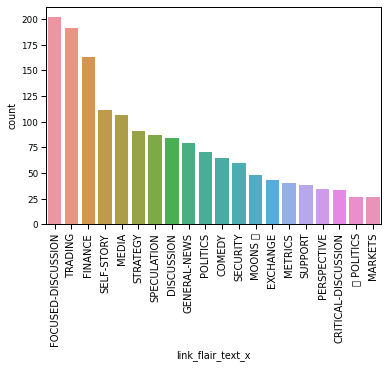

In [52]:
#counplot of 
sns.countplot(x='link_flair_text_x',data=hot_new,order=hot_new['link_flair_text_x'].value_counts().nlargest(20).index)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.show()

In [53]:
hot_new.to_csv('/Users/adityaravindrabhat/Downloads/hot_new.csv')